## Genetic Algorithm Solving Travelling Salesman Problem

In [101]:
# Import necessary Libraries.

import numpy as np
import matplotlib.pyplot as plt
import random
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "Sarang")

In [102]:
# Gathering the coordinates of the nodes/cities mentioned.
Cities_key = ["Mumbai","Pune","Nagpur","Nashik","Thane","Aurangabad",
              "Solapur","Amravati","Kolhapur","Navi Mumbai","Akola",
              "Jalgaon","Latur","Sangli","Bhiwandi","Dhule","Ahmednagar",
              "Chandrapur","Parbhani","Jalna"]

# Indexing the above cities as their ID.
Cities_index = list(range(len(Cities_key)))

X_Cities = []
Y_Cities = []
for i in Cities_key:
    location = geolocator.geocode(i)
    Y_Cities.append(location.latitude)                 # X-coordinates i.e. Latitudes.
    X_Cities.append(location.longitude)                # Y-coordinates i.e. Longitudes.

In [103]:
# Forming the cost adjencency matrix.

def Distance_Matrix(Cities_index,X_Cities,Y_Cities):
    def Distance(X1,X2,Y1,Y2):
        return np.sqrt(((X2-X1)**2)+((Y2-Y1)**2))
    City_Distance = []
    for i in range(len(Cities_index)):
        Dist = []
        for j in range(len(Cities_index)):
            if i == j:
                Dist.append(0)
            else:
                d = Distance(X_Cities[i],X_Cities[j],Y_Cities[i],Y_Cities[j])
                Dist.append(d)
        City_Distance.append(Dist)
    return City_Distance
City_Distance = Distance_Matrix(Cities_index,X_Cities,Y_Cities)

In [104]:
# Function to find distance of the path.

def dist(current_path):
  Cost = 0
  for i in range(len(current_path)-1):
    Cost = Cost + City_Distance[current_path[i]][current_path[i+1]]
  Cost = Cost + City_Distance[current_path[-1]][current_path[0]]
  return Cost

In [105]:

# Function to create Intial Pool of Solutions.
def Initial_Population(Cities_index,Population_size):
    
    initial_population = []
    
    for i in range(Population_size):
        
        start_position = [Cities_index[0]]
        path = random.sample(Cities_index[1:],len(Cities_index[1:]))
        start_position = start_position + path
        initial_population.append(start_position)
        
    return initial_population
        


In [106]:
# Selection of Parents through Tournament Selection.
def Parent_Selection(initial_population,parent_population_size):
    
    Parent_Population = random.sample(initial_population, parent_population_size)
    Parent_Fitness = []
    
    for i in Parent_Population:
        Parent_Fitness.append(dist(i))
        
    P1 = Parent_Population[Parent_Fitness.index(min(Parent_Fitness))]
    Parent_Population.remove(P1)
    Parent_Fitness.remove(min(Parent_Fitness))

    P2 = Parent_Population[Parent_Fitness.index(min(Parent_Fitness))]
    Parents = []
    Parents.append(P1)
    Parents.append(P2)
    return Parents


In [107]:
# Multi-Point Crossover function to create offsprings.

def Crossover(Parents):
    Sections = random.sample(range(1,len(Parents[0][1:])+1),1)
    
    Child1 = Parents[0][:Sections[0]]
    Child2 = Parents[1][:Sections[0]]

    for i in range(len(Parents[1][Sections[0]:])):
        if Parents[1][Sections[0]:][i] not in Child1:
            Child1.append(Parents[1][Sections[0]:][i])
                
    for j in range(len(Parents[0][Sections[0]:])):
        if Parents[0][Sections[0]:][j] not in Child2:
            Child2.append(Parents[0][Sections[0]:][j])
            
    for k in Cities_index:
        if k not in Child1:
            Child1.append(k)
        if k not in Child2:
            Child2.append(k)
    
    return Child1, Child2


In [108]:
# Function for mutation within the offsprings.

def Mutation(Offsprings):
    
    mPoint = random.sample(range(1,len(Parents[0][1:])+1),2)
    
   
    Offsprings[0][mPoint[0]], Offsprings[0][mPoint[1]] = Offsprings[0][mPoint[1]], Offsprings[0][mPoint[0]]
    Offsprings[1][mPoint[0]], Offsprings[1][mPoint[1]] = Offsprings[1][mPoint[1]], Offsprings[1][mPoint[0]]
    
    return Offsprings



In [109]:
# Function to find Optimal Path between Parents and Offsprins/Mutated Offsprings.

def Optimum_path(MOffsprings,Parents):
    if dist(Parents[0]) <= dist(Parents[1]):
        Path_Pmin = Parents[0]
        Path_Pmax = Parents[1]
    else:
        Path_Pmin = Parents[1]
        Path_Pmax = Parents[0]
        
    if dist(MOffsprings[0]) <= dist(MOffsprings[1]):
        Path_Omin = MOffsprings[0]
        
    else:
        Path_Omin = MOffsprings[1]
        
    if dist(Path_Pmin) <= dist(Path_Omin):
        MinPath = Path_Pmin 
    else:
        MinPath = Path_Omin
    return MinPath, Path_Pmax


In [110]:
#  Genetic Algorithm

Cities_index = random.sample(Cities_index,k=len(Cities_index))
Population_size = 100
parent_population_size = 10
mutation_rate = 0.2
No_of_generation = 200
Best_path = []
Prev_Path = 0
initial_population = Initial_Population(Cities_index,Population_size)
for i in range(No_of_generation):

    # initial_population = Initial_Population(Cities_index,Population_size)
    Parents = Parent_Selection(initial_population,parent_population_size)
    Offsprings = Crossover(Parents)

    if np.random.rand() >= mutation_rate:
        MOffsprings = Mutation(Offsprings)
    else:
        MOffsprings = Offsprings
    Optimum = Optimum_path(MOffsprings,Parents)
    initial_population.append(Optimum[0])
    # print(dist(Optimum[0]))
    if i == 0:
        OptimalPath = Optimum[0]
        Prev_Path = dist(Optimum[0])
        Best_path.append(Prev_Path)
    else:
        if Prev_Path <= dist(Optimum[0]):
            # OptimalPath = OPath
            Best_path.append(Prev_Path)
        else:
            OptimalPath = Optimum[0]
            Prev_Path = dist(Optimum[0])
            Best_path.append(dist(Optimum[0]))
    
    initial_population.remove(Optimum[1])

Text(0.5, 0, 'Generations')

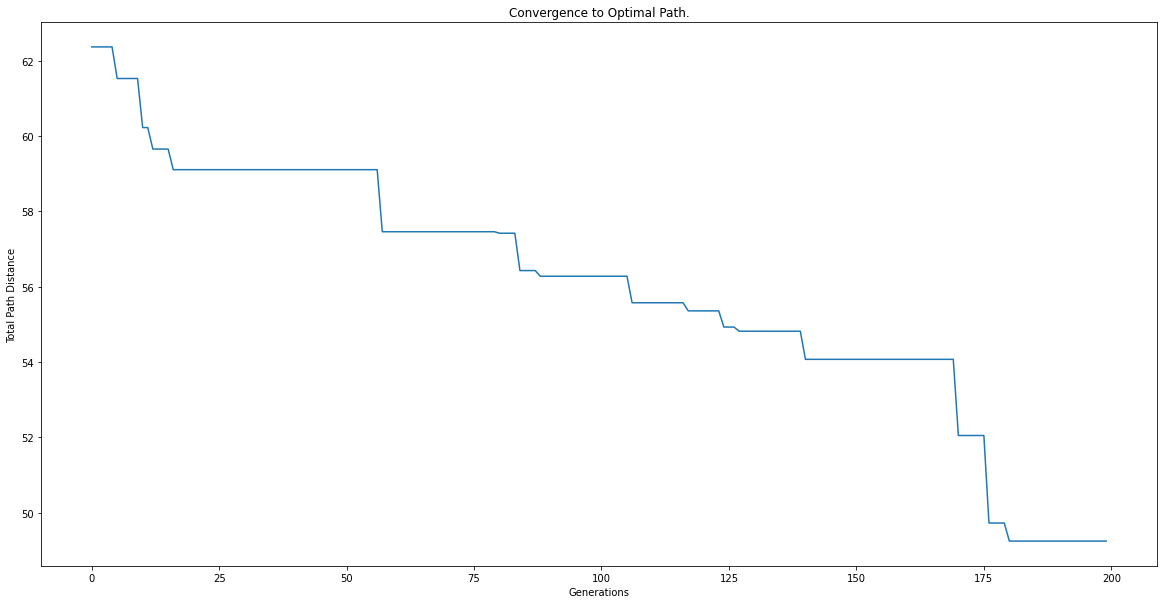

In [111]:
#  Convergence to Optimal Path Plot.

plt.plot(Best_path)
plt.title("Convergence to Optimal Path.")
plt.ylabel("Total Path Distance")
plt.xlabel("Generations")

In [112]:
# Optimal Path and its distance.

print(OptimalPath)
print(dist(OptimalPath))

[17, 7, 10, 9, 0, 14, 1, 4, 15, 16, 18, 19, 13, 11, 3, 8, 6, 12, 2, 5]
49.2457055866112


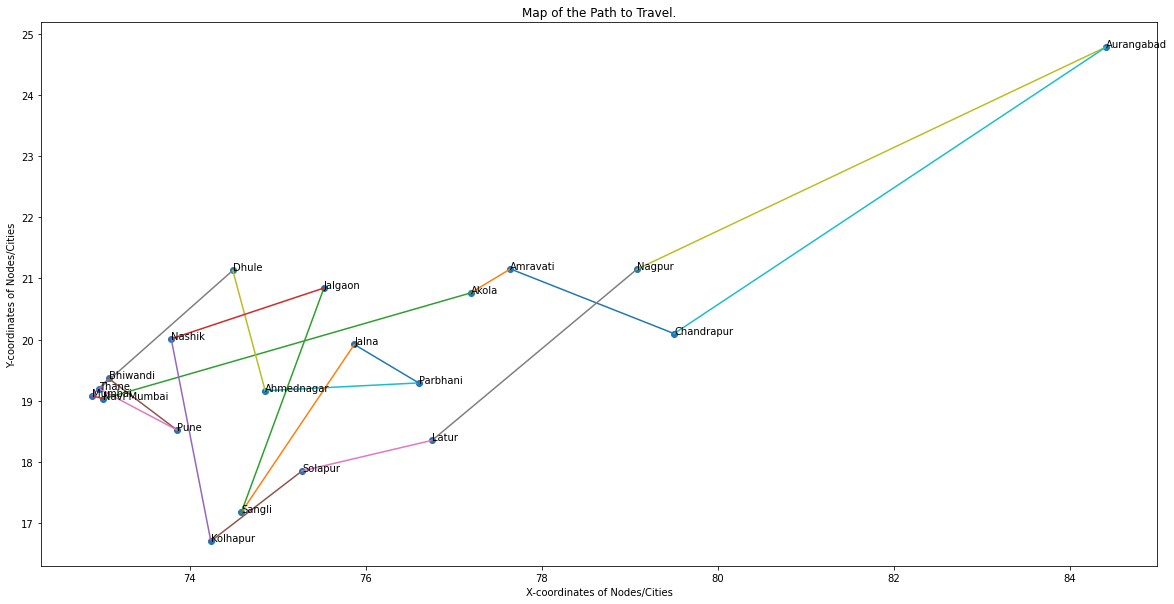

In [113]:
# Map of the Optimal Path.

plt.scatter(X_Cities,Y_Cities)
for i in range(len(OptimalPath)-1):
    plt.plot([X_Cities[OptimalPath[i]],X_Cities[OptimalPath[i+1]]],[Y_Cities[OptimalPath[i]],Y_Cities[OptimalPath[i+1]]])
plt.plot([X_Cities[OptimalPath[-1]],X_Cities[OptimalPath[0]]],[Y_Cities[OptimalPath[-1]],Y_Cities[OptimalPath[0]]])
for i in range(len(Cities_index)):
    plt.text(X_Cities[i],Y_Cities[i], f'{Cities_key[i]}')
# plt.rcParams['figure.figsize'] = [20, 10]
plt.title("Map of the Path to Travel.")
plt.ylabel("Y-coordinates of Nodes/Cities")
plt.xlabel("X-coordinates of Nodes/Cities")
plt.show()